In [1]:
# !pip install git+https://github.com/carla-recourse/carla.git


In [2]:
from carla.data.catalog import CsvCatalog

continuous = ["age", "fnlwgt", "education.num", "capital.gain", "hours.per.week", "capital.loss"]
categorical = ["marital.status", "native.country", "occupation", "race", "relationship", "sex", "workclass"]
immutable = ["age", "sex"]

from carla.data.catalog import OnlineCatalog

# load catalog dataset
data_name = "adult"
dataset = OnlineCatalog(data_name)

display(dataset.df.head())


/home/berni/education/counterfactuals/.venv37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/berni/education/counterfactuals/.venv37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/berni/education/counterfactuals/.venv37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/berni/e

[INFO] Using Python-MIP package version 1.12.0 [model.py <module>]


,age,fnlwgt,education-num,capital-gain,capital-loss,...,occupation_Other,race_White,relationship_Non-Husband,sex_Male,workclass_Private
0,0.301370,0.044131,0.800000,0.02174,0.0,...,0.0,1.0,1.0,1.0,0.0
1,0.452055,0.048052,0.800000,0.00000,0.0,...,0.0,1.0,0.0,1.0,0.0
2,0.287671,0.137581,0.533333,0.00000,0.0,...,1.0,1.0,1.0,1.0,1.0
3,0.493151,0.150486,0.400000,0.00000,0.0,...,1.0,0.0,0.0,1.0,1.0
4,0.150685,0.220635,0.800000,0.00000,0.0,...,0.0,0.0,1.0,0.0,1.0


In [3]:
from carla.models.catalog import MLModelCatalog

training_params = {"lr": 0.002, "epochs": 10, "batch_size": 1024, "hidden_size": [27, 18, 9, 3]}

ml_model = MLModelCatalog(
    dataset,
    model_type="ann",
    load_online=False,
    backend="pytorch"
)

ml_model.train(
    learning_rate=training_params["lr"],
    epochs=training_params["epochs"],
    batch_size=training_params["batch_size"],
    hidden_size=training_params["hidden_size"],
    force_train=True,
)


balance on test set 0.23883245958934032, balance on test set 0.2408256880733945
Epoch 0/9
----------


/home/berni/education/counterfactuals/.venv37/lib/python3.7/site-packages/carla/models/catalog/ANN_TORCH/model_ann.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


train Loss: 0.4482 Acc: 0.7820

test Loss: 0.4044 Acc: 0.8113

Epoch 1/9
----------
train Loss: 0.3885 Acc: 0.8099

test Loss: 0.3798 Acc: 0.8228

Epoch 2/9
----------
train Loss: 0.3705 Acc: 0.8207

test Loss: 0.3599 Acc: 0.8324

Epoch 3/9
----------
train Loss: 0.3594 Acc: 0.8263

test Loss: 0.3525 Acc: 0.8359

Epoch 4/9
----------
train Loss: 0.3509 Acc: 0.8331

test Loss: 0.3499 Acc: 0.8343

Epoch 5/9
----------
train Loss: 0.3471 Acc: 0.8332

test Loss: 0.3489 Acc: 0.8337

Epoch 6/9
----------
train Loss: 0.3425 Acc: 0.8364

test Loss: 0.3433 Acc: 0.8404

Epoch 7/9
----------
train Loss: 0.3392 Acc: 0.8401

test Loss: 0.3391 Acc: 0.8376

Epoch 8/9
----------
train Loss: 0.3376 Acc: 0.8395

test Loss: 0.3372 Acc: 0.8428

Epoch 9/9
----------
train Loss: 0.3370 Acc: 0.8400

test Loss: 0.3360 Acc: 0.8437



In [4]:
ml_model.predict_proba(ml_model.get_ordered_features(dataset.df))


array([[0.8376734 , 0.16232657],
       [0.5694957 , 0.43050432],
       [0.98862284, 0.01137721],
       ...,
       [0.32701665, 0.67298335],
       [0.6885402 , 0.31145978],
       [0.3219801 , 0.6780199 ]], dtype=float32)

In [5]:
from carla.models.negative_instances import predict_negative_instances
import carla.recourse_methods.catalog as recourse_catalog

factuals = predict_negative_instances(ml_model, dataset.df)
test_factual = factuals.iloc[:5]

display(test_factual)


,age,fnlwgt,education-num,capital-gain,capital-loss,...,occupation_Other,race_White,relationship_Non-Husband,sex_Male,workclass_Private
0,0.301370,0.044131,0.800000,0.02174,0.0,...,0.0,1.0,1.0,1.0,0.0
1,0.452055,0.048052,0.800000,0.00000,0.0,...,0.0,1.0,0.0,1.0,0.0
2,0.287671,0.137581,0.533333,0.00000,0.0,...,1.0,1.0,1.0,1.0,1.0
3,0.493151,0.150486,0.400000,0.00000,0.0,...,1.0,0.0,0.0,1.0,1.0
6,0.438356,0.100061,0.266667,0.00000,0.0,...,1.0,0.0,1.0,0.0,1.0


In [6]:
ml_model.predict_proba(ml_model.get_ordered_features(test_factual))


/home/berni/education/counterfactuals/.venv37/lib/python3.7/site-packages/carla/models/catalog/ANN_TORCH/model_ann.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


array([[0.8376735 , 0.16232654],
       [0.5694957 , 0.43050432],
       [0.98862284, 0.01137722],
       [0.8873588 , 0.11264123],
       [0.99691594, 0.00308407]], dtype=float32)

In [7]:
hyperparams = {"loss_type": "BCE", "binary_cat_features": True}
recourse_method = recourse_catalog.Wachter(ml_model, hyperparams)
df_cfs = recourse_method.get_counterfactuals(test_factual)

display(df_cfs)


[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


,age,fnlwgt,education-num,capital-gain,capital-loss,...,occupation_Other,relationship_Non-Husband,race_White,sex_Male,native-country_US
0,0.349331,0.091807,0.848075,0.069805,0.047854,...,0.0,1.0,1.0,1.0,1.0
1,0.472067,0.067724,0.819991,0.019999,0.019845,...,0.0,0.0,1.0,1.0,1.0
2,0.392577,0.242698,0.640129,0.106819,0.106381,...,1.0,1.0,1.0,1.0,1.0
3,0.559430,0.217399,0.466538,0.066577,0.066207,...,1.0,0.0,0.0,1.0,1.0
6,0.601157,0.261657,0.429815,0.163124,0.163026,...,1.0,1.0,0.0,0.0,0.0


In [8]:
ml_model.predict_proba(ml_model.get_ordered_features(df_cfs))


/home/berni/education/counterfactuals/.venv37/lib/python3.7/site-packages/carla/models/catalog/ANN_TORCH/model_ann.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


array([[0.4683093 , 0.5316907 ],
       [0.43182555, 0.5681744 ],
       [0.45821708, 0.5417829 ],
       [0.4865501 , 0.5134499 ],
       [0.4597333 , 0.5402667 ]], dtype=float32)

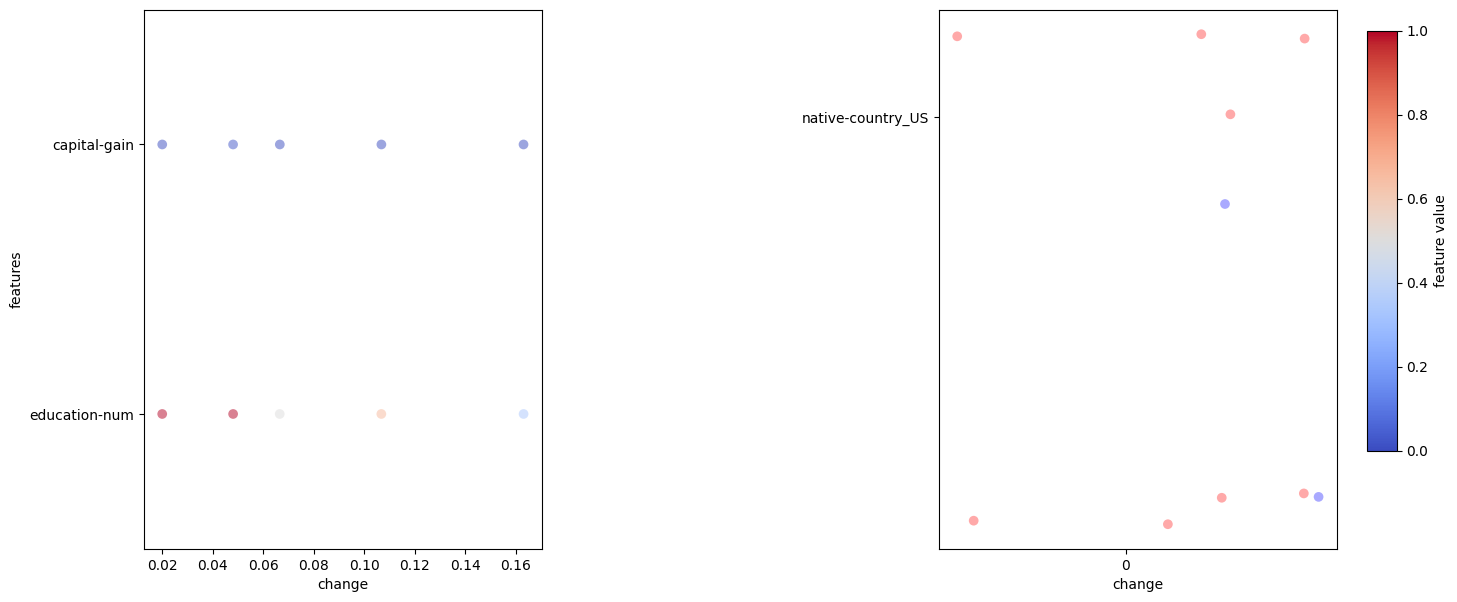

In [9]:
from carla.plotting.plotting import summary_plot

summary_plot(
    test_factual,
    df_cfs,
    dataset,
    2)


In [10]:
ml_model = MLModelCatalog(dataset, "forest", backend="sklearn", load_online=False)
ml_model.train(max_depth=2, n_estimators=5, force_train=True)

factuals = predict_negative_instances(ml_model, dataset.df)
test_factual = factuals.iloc[:5]

display(test_factual)


balance on test set 0.23883245958934032, balance on test set 0.2408256880733945
model fitted with training score 0.8029707295762342 and test score 0.8046363040629095


,age,fnlwgt,education-num,capital-gain,capital-loss,...,occupation_Other,race_White,relationship_Non-Husband,sex_Male,workclass_Private
0,0.301370,0.044131,0.800000,0.02174,0.0,...,0.0,1.0,1.0,1.0,0.0
1,0.452055,0.048052,0.800000,0.00000,0.0,...,0.0,1.0,0.0,1.0,0.0
2,0.287671,0.137581,0.533333,0.00000,0.0,...,1.0,1.0,1.0,1.0,1.0
3,0.493151,0.150486,0.400000,0.00000,0.0,...,1.0,0.0,0.0,1.0,1.0
4,0.150685,0.220635,0.800000,0.00000,0.0,...,0.0,0.0,1.0,0.0,1.0


In [11]:
from carla import MLModel
import xgboost

class XGBoostModel(MLModel):
    """The default way of implementing XGBoost
    https://xgboost.readthedocs.io/en/latest/python/python_intro.html"""

    def __init__(self, data):
        super().__init__(data)

        # get preprocessed data
        df_train = self.data.df_train
        df_test = self.data.df_test

        x_train = df_train[self.data.continuous]
        y_train = df_train[self.data.target]
        x_test = df_test[self.data.continuous]
        y_test = df_test[self.data.target]

        self._feature_input_order = self.data.continuous

        param = {
            "max_depth": 2,  # determines how deep the tree can go
            "objective": "binary:logistic",  # determines the loss function
            "n_estimators": 5,
        }
        self._mymodel = xgboost.XGBClassifier(**param)
        self._mymodel.fit(
                x_train,
                y_train,
                eval_set=[(x_train, y_train), (x_test, y_test)],
                eval_metric="logloss",
                verbose=True,
            )

    @property
    def feature_input_order(self):
        # List of the feature order the ml model was trained on
        return self._feature_input_order

    @property
    def backend(self):
        # The ML framework the model was trained on
        return "xgboost"

    @property
    def raw_model(self):
        # The black-box model object
        return self._mymodel

    @property
    def tree_iterator(self):
        # make a copy of the trees, else feature names are not saved
        booster_it = [booster for booster in self.raw_model.get_booster()]
        # set the feature names
        for booster in booster_it:
            booster.feature_names = self.feature_input_order
        return booster_it

    # The predict function outputs
    # the continuous prediction of the model
    def predict(self, x):
        return self._mymodel.predict(self.get_ordered_features(x))

    # The predict_proba method outputs
    # the prediction as class probabilities
    def predict_proba(self, x):
        return self._mymodel.predict_proba(self.get_ordered_features(x))


In [12]:
ml_model = XGBoostModel(dataset)

factuals = predict_negative_instances(ml_model, dataset.df)
test_factual = factuals.iloc[:5]

display(test_factual)


[0]	validation_0-logloss:0.58386	validation_1-logloss:0.58337


/home/berni/education/counterfactuals/.venv37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-logloss:0.52314	validation_1-logloss:0.52368
[2]	validation_0-logloss:0.48468	validation_1-logloss:0.48474
[3]	validation_0-logloss:0.45944	validation_1-logloss:0.46031
[4]	validation_0-logloss:0.43972	validation_1-logloss:0.44170


,age,fnlwgt,education-num,capital-gain,capital-loss,...,occupation_Other,race_White,relationship_Non-Husband,sex_Male,workclass_Private
0,0.301370,0.044131,0.800000,0.02174,0.0,...,0.0,1.0,1.0,1.0,0.0
1,0.452055,0.048052,0.800000,0.00000,0.0,...,0.0,1.0,0.0,1.0,0.0
2,0.287671,0.137581,0.533333,0.00000,0.0,...,1.0,1.0,1.0,1.0,1.0
3,0.493151,0.150486,0.400000,0.00000,0.0,...,1.0,0.0,0.0,1.0,1.0
4,0.150685,0.220635,0.800000,0.00000,0.0,...,0.0,0.0,1.0,0.0,1.0


In [13]:
hyperparams = {
    "optimizer": "adam",
    "lr": 0.001,
    "n_class": 2,
    "n_iter": 1000,
    "sigma": 1.0,
    "temperature": 1.0,
    "distance_weight": 0.01,
    "distance_func": "l1",
}

focus = recourse_catalog.FOCUS(ml_model, hyperparams)
df_cfs = focus.get_counterfactuals(test_factual)
display(df_cfs)


[WARNING] From /home/berni/education/counterfactuals/.venv37/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where [deprecation.py new_func]
[WARNING] Calling GradientTape.gradient on a persistent tape inside its context is significantly less efficient than calling it outside the context (it causes the gradient ops to be recorded on the tape, leading to increased CPU and memory usage). Only call GradientTape.gradient inside the context if you actually want to trace the gradient in order to compute higher order derivatives. [backprop.py gradient]


2025-04-01 23:08:54.031202: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2025-04-01 23:08:54.033461: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 4099990000 Hz
2025-04-01 23:08:54.033860: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6261ffa04090 executing computations on platform Host. Devices:
2025-04-01 23:08:54.033872: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2025-04-01 23:08:54.036523: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA

,age,fnlwgt,education-num,capital-gain,hours-per-week,capital-loss
0,0.301374,0.044131,0.799976,0.051016,0.397913,0.0
1,0.452075,0.048052,0.800036,0.051024,0.122492,0.0
2,0.287651,0.137581,0.533279,0.050995,0.397960,0.0
3,0.493151,0.150486,0.400033,0.051015,0.397955,0.0
4,0.150688,0.220635,0.800022,0.050957,0.397977,0.0


In [ ]:
!pip freeze


absl-py==2.1.0
astor==0.8.1
backcall==0.2.0
carla-recourse @ git+https://github.com/carla-recourse/carla.git@24db00aa8616eb2faedea0d6edf6e307cee9d192
causalgraphicalmodels==0.0.4
cffi==1.15.1
cplex==22.1.0.0
cycler==0.11.0
dataclasses==0.6
debugpy==1.7.0
decorator==5.1.1
dice-ml==0.5
entrypoints==0.4
exceptiongroup==1.2.2
fonttools==4.38.0
future==1.0.0
gast==0.6.0
google-pasta==0.2.0
graphviz==0.20.1
grpcio==1.62.3
h5py==2.10.0
imageio==2.31.2
importlib-metadata==6.7.0
iniconfig==2.0.0
ipykernel==6.16.2
ipython==7.34.0
jedi==0.19.2
Jinja2==3.1.6
joblib==1.3.2
jupyter_client==7.4.9
jupyter_core==4.12.0
Keras==2.3.0
Keras-Applications==1.0.8
Keras-Preprocessing==1.1.2
kiwisolver==1.4.5
lime==0.2.0.1
Markdown==3.4.4
MarkupSafe==2.1.5
matplotlib==3.5.3
matplotlib-inline==0.1.6
mip==1.12.0
nest-asyncio==1.6.0
networkx==2.6.3
numpy==1.19.4
packaging==24.0
pandas==1.1.4
parso==0.8.4
pexpect==4.9.0
pickleshare==0.7.5
Pillow==9.5.0
pluggy==1.2.0
prettytable==3.7.0
prompt_toolkit==3.0.48
protob